# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and folium.

In [52]:
# Import Required Libraries
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
Load the dataset containing latitude and longitude information.

In [53]:
# Load Data
data = pd.read_csv('data/ev_stations_v1.csv')  # Replace with your file path
data.head()  # Display the first few rows of the dataset

C:\Users\rdinh\AppData\Local\Temp\ipykernel_6088\3910194436.py:2: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/ev_stations_v1.csv')  # Replace with your file path


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extract Latitude and Longitude
Extract the latitude and longitude columns from the dataset.

In [54]:
# Extract Latitude and Longitude
latitude = data['Latitude']
longitude = data['Longitude']

# Display the first few rows of the latitude and longitude columns
pd.DataFrame({'Latitude': latitude, 'Longitude': longitude}).head()

,Latitude,Longitude
0,34.248319,-118.387971
1,34.052542,-118.448504
2,34.040539,-118.271387
3,34.059133,-118.248589
4,33.759802,-118.096665


# Generate Heatmap
Use the folium library to generate a heatmap based on the extracted latitude and longitude data.

In [55]:
# Generate Heatmap
from folium.plugins import HeatMap

# Create a base map
base_map = folium.Map(location=[latitude.mean(), longitude.mean()], zoom_start=10)

# Prepare the data for the heatmap
heat_data = [[lat, lon] for lat, lon in zip(latitude, longitude)]

# Add the heatmap to the base map
HeatMap(heat_data, radius=12).add_to(base_map)

# Display the map
base_map
base_map.save('heatmap.html')  # Save the map to an HTML file

In [56]:
lvl1 = data['EV Level1 EVSE Num']
lvl2 = data['EV Level2 EVSE Num']
lvlf = data['EV DC Fast Count']

df = pd.DataFrame({'Level 1': lvl1, 'Level 2': lvl2, 'DC Fast': lvlf}).sum()

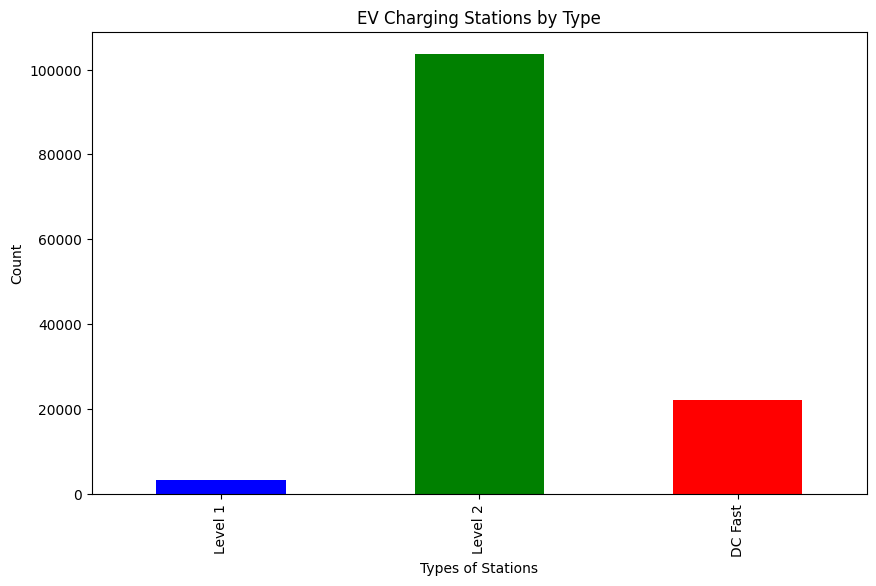

In [57]:
df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.title('EV Charging Stations by Type')
plt.xlabel('Types of Stations')
plt.ylabel('Count')

# Show the plot
plt.show()

In [58]:
EVPricing = data['EV Pricing']
State = data['State']

pd.DataFrame({'EV Pricing': EVPricing}).head()

,EV Pricing
0,NaN
1,Free
2,NaN
3,NaN
4,NaN


In [59]:
print(len(EVPricing))

String = []

for i in range(len(EVPricing)):
    if not pd.isnull(EVPricing[i]):
        if EVPricing[i] == 'Free':
            
            String.append(('Free', State[i]))
        else:
            String.append(('Pay', State[i]))

# Create a dictionary of lists to store all entries
String_dict = {}
for status, state in String:
    if state not in String_dict:
        String_dict[state] = []
    String_dict[state].append(status)

# print(len(String))
# print(String)
# print(len(String_dict))
# print(String_dict)

# Count the number of 'Free' and 'Pay' entries for each state
State_count = {}
for state, statuses in String_dict.items():
    free_count = statuses.count('Free')
    pay_count = statuses.count('Pay')
    State_count[state] = {'Free/Pay Ratio': free_count/pay_count}

print(State_count)
#print(len(State_count))
    

50289
{'CA': {'Free/Pay Ratio': 1.5169811320754718}, 'VT': {'Free/Pay Ratio': 2.0208333333333335}, 'OR': {'Free/Pay Ratio': 0.7535211267605634}, 'WA': {'Free/Pay Ratio': 0.6616541353383458}, 'IL': {'Free/Pay Ratio': 2.919642857142857}, 'ID': {'Free/Pay Ratio': 1.7692307692307692}, 'TX': {'Free/Pay Ratio': 1.563467492260062}, 'IA': {'Free/Pay Ratio': 2.6956521739130435}, 'MN': {'Free/Pay Ratio': 3.574468085106383}, 'CT': {'Free/Pay Ratio': 3.753846153846154}, 'NJ': {'Free/Pay Ratio': 1.1666666666666667}, 'NY': {'Free/Pay Ratio': 2.9766355140186915}, 'SC': {'Free/Pay Ratio': 2.8076923076923075}, 'OH': {'Free/Pay Ratio': 3.3970588235294117}, 'WV': {'Free/Pay Ratio': 4.294117647058823}, 'MO': {'Free/Pay Ratio': 2.282051282051282}, 'UT': {'Free/Pay Ratio': 2.0}, 'MA': {'Free/Pay Ratio': 1.180952380952381}, 'FL': {'Free/Pay Ratio': 1.2417582417582418}, 'CO': {'Free/Pay Ratio': 1.2554347826086956}, 'IN': {'Free/Pay Ratio': 2.3333333333333335}, 'MI': {'Free/Pay Ratio': 1.9078947368421053}, 'NC

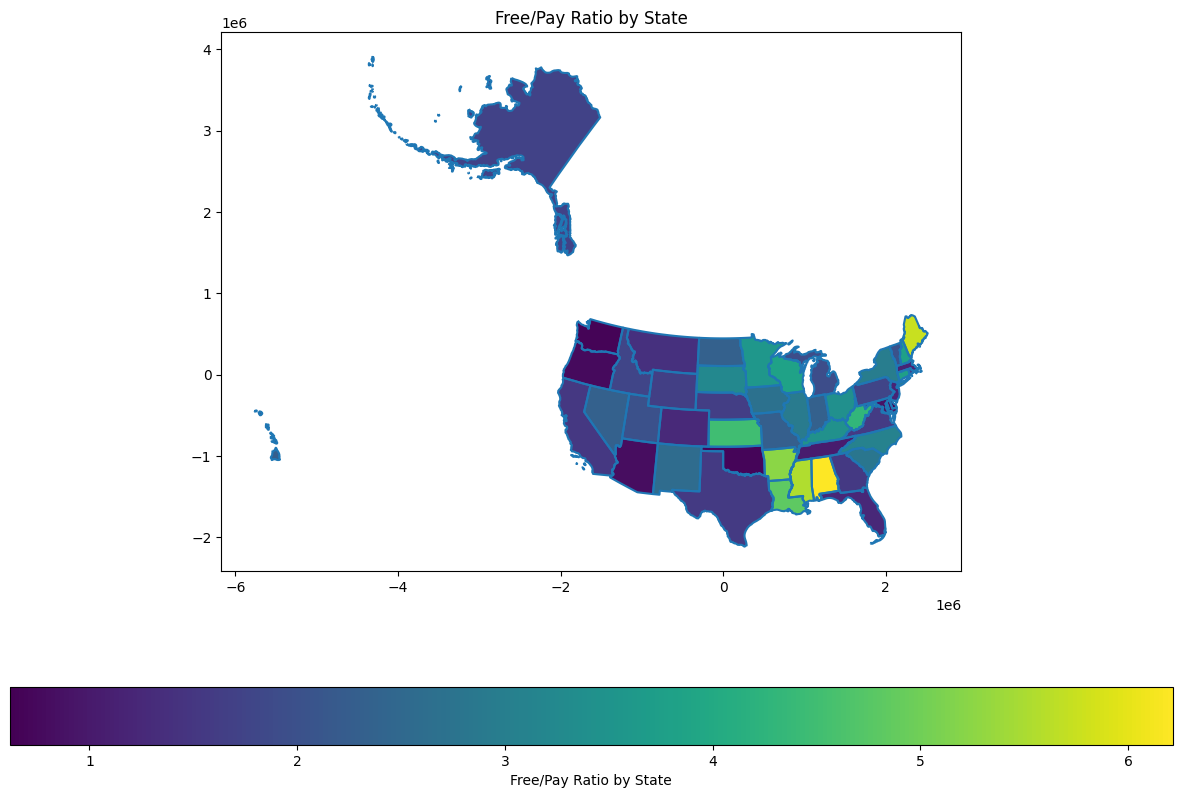

In [60]:
# Load the US states shapefile
gdf = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')
gdf = gdf[gdf['STUSPS'] != 'PR']  # Exclude Puerto Rico
gdf = gdf.to_crs(epsg=2163)  # Use a suitable projection for the US

# Create a DataFrame from State_count
state_ratios = pd.DataFrame.from_dict(State_count, orient='index')
state_ratios.reset_index(inplace=True)
state_ratios.columns = ['state', 'Free/Pay Ratio']

# Merge the state_ratios DataFrame with the GeoDataFrame
gdf = gdf.merge(state_ratios, left_on='STUSPS', right_on='state', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.boundary.plot(ax=ax)
gdf.plot(column='Free/Pay Ratio', ax=ax, legend=True,
         legend_kwds={'label': "Free/Pay Ratio by State",
                      'orientation': "horizontal"})

# Add labels, title, and legend
ax.set_title('Free/Pay Ratio by State')
plt.show()

In [ ]:
#Does not work as intended (boiler plate code)


# Create a DataFrame from State_count
state_ratios = pd.DataFrame.from_dict(State_count, orient='index')
state_ratios.reset_index(inplace=True)
state_ratios.columns = ['state', 'Free/Pay Ratio']

# Example features (replace these with actual relevant features)
state_ratios['population'] = np.random.randint(500000, 40000000, size=len(state_ratios))
state_ratios['median_income'] = np.random.randint(40000, 100000, size=len(state_ratios))
state_ratios['num_ev_charging_stations'] = np.random.randint(50, 5000, size=len(state_ratios))
state_ratios['avg_electricity_price'] = np.random.uniform(0.08, 0.20, size=len(state_ratios))

# Define features (X) and target (y)
X = state_ratios[['population', 'median_income', 'num_ev_charging_stations', 'avg_electricity_price']]
y = state_ratios['Free/Pay Ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Make predictions on new data (example)
new_data = pd.DataFrame({
    'population': [1000000],
    'median_income': [60000],
    'num_ev_charging_stations': [1000],
    'avg_electricity_price': [0.12]
})
predicted_ratio = model.predict(new_data)
print(f"Predicted Free/Pay Ratio: {predicted_ratio[0]}")

Mean Squared Error: 1.931049467379516
R^2 Score: -0.09508960943125966
Predicted Free/Pay Ratio: 2.803718389116481
